| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./1.REGRESION_LINEAL.ipynb)| [⏩](./3.ANALISIS_DISCRIMINANTE.ipynb)|

# **2. REGRESIÓN LOGÍSTICA**

## **Formulación a partir del Modelo Lineal Generalizado**

La formulación a partir del Modelo Lineal Generalizado (MLG) es una extensión del modelo lineal clásico que permite modelar y analizar diferentes tipos de variables de respuesta, incluyendo variables binarias, conteos y variables continuas. El MLG se basa en la idea de que la variable de respuesta depende de una combinación lineal de las variables predictoras, a través de una función de enlace y una función de varianza.

La formulación general del MLG se puede expresar de la siguiente manera:

1. **Variables de respuesta:** La variable de respuesta se denota como `Y` y puede pertenecer a diferentes tipos, como binaria (0 o 1), conteo o continua.

2. **Predictoras:** Las variables predictoras, también conocidas como variables independientes o covariables, se denotan como `X` y pueden ser múltiples. Estas variables se consideran linealmente relacionadas con la variable de respuesta.

3. **Función de enlace:** La función de enlace se utiliza para relacionar la combinación lineal de las variables predictoras con el valor esperado de la variable de respuesta. Ejemplos de funciones de enlace comunes incluyen la función `logit` para variables binarias, la función logarítmica para variables de conteo y la función identidad para variables continuas.

4. **Función de varianza:** La función de varianza describe cómo varía la varianza de la variable de respuesta en función de los valores de las variables predictoras. Dependiendo del tipo de variable de respuesta, se pueden utilizar diferentes funciones de varianza, como la función de varianza constante para variables continuas o la función de varianza dependiente de la media para variables de conteo.

A continuación, se muestra un ejemplo de implementación en Python utilizando el módulo `statsmodels`:

In [1]:
import numpy as np
import statsmodels.api as sm

# Datos de ejemplo
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])
Y = np.array([0, 1, 0])

# Agregar una constante a la matriz X para el término de intercepción
X = sm.add_constant(X)

# Crear el modelo lineal generalizado
model = sm.GLM(Y, X, family=sm.families.Binomial())

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir los resultados
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    3
Model:                            GLM   Df Residuals:                        1
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1.9095
Date:                Sat, 01 Jul 2023   Deviance:                       3.8191
Time:                        11:48:31   Pearson chi2:                     3.00
No. Iterations:                     4   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4621      1.931     -0.239      0.8

/home/puma/anaconda3/lib/python3.9/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


En este ejemplo, se ajusta un modelo lineal generalizado utilizando la familia binomial, que es apropiada para variables de respuesta binarias. Se utilizan dos variables predictoras y se agrega una constante a la matriz `X` para el término de intercepción. Luego, se ajusta el modelo a los datos y se imprimen los resultados resumidos.

Es importante destacar que el `MLG` ofrece una forma flexible de modelar diferentes tipos de variables de respuesta y permite realizar inferencias y realizar pruebas de hipótesis sobre los coeficientes del modelo. La elección de la familia y las funciones de enlace y varianza dependen del tipo de variable de respuesta y de las suposiciones del problema específico.

## **Estimación de parámetros**

La estimación de parámetros es un proceso fundamental en el análisis estadístico y consiste en determinar los valores más adecuados para los parámetros de un modelo estadístico a partir de los datos observados. Los parámetros representan las características desconocidas de la población subyacente que se desea modelar o analizar.

Existen diferentes métodos para estimar los parámetros, y uno de los más utilizados es el método de máxima verosimilitud. Este método busca encontrar los valores de los parámetros que maximizan la probabilidad de observar los datos dados los valores de los parámetros. En otras palabras, busca encontrar los valores de los parámetros que hacen que los datos observados sean los más probables bajo el modelo propuesto.

A continuación, se presenta un ejemplo de estimación de parámetros utilizando el método de máxima verosimilitud en Python:

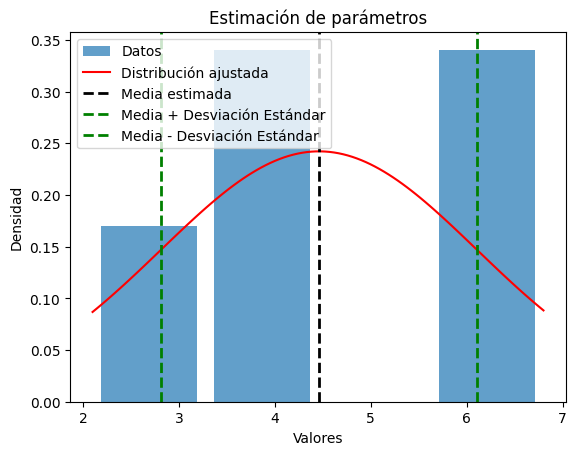

Parámetros estimados:
Media (mu): 4.46
Desviación estándar (sigma): 1.6475436261295178


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos de ejemplo
data = np.array([2.1, 3.5, 4.2, 5.7, 6.8])

# Estimar parámetros utilizando la distribución normal
mu_est, sigma_est = norm.fit(data)

# Graficar el histograma de los datos
plt.hist(data, bins='auto', density=True, alpha=0.7, rwidth=0.85, label='Datos')

# Graficar la distribución ajustada
x = np.linspace(min(data), max(data), 100)
y = norm.pdf(x, mu_est, sigma_est)
plt.plot(x, y, 'r-', label='Distribución ajustada')

# Línea vertical para la media estimada
plt.axvline(mu_est, color='k', linestyle='dashed', linewidth=2, label='Media estimada')

# Líneas verticales para la media ± desviación estándar estimada
plt.axvline(mu_est + sigma_est, color='g', linestyle='dashed', linewidth=2, label='Media + Desviación Estándar')
plt.axvline(mu_est - sigma_est, color='g', linestyle='dashed', linewidth=2, label='Media - Desviación Estándar')

plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Estimación de parámetros')
plt.legend()
plt.show()

print('Parámetros estimados:')
print('Media (mu):', mu_est)
print('Desviación estándar (sigma):', sigma_est)

En este ejemplo, se tienen datos de muestra almacenados en el arreglo `data`. Se utiliza la distribución normal para modelar los datos y se estima la media y la desviación estándar utilizando el método de máxima verosimilitud. Luego, se grafican los datos observados en forma de histograma y se superpone la distribución normal ajustada. Por último, se imprimen los valores estimados de los parámetros.

Es importante destacar que la estimación de parámetros depende del modelo estadístico y de las suposiciones subyacentes. Otros métodos de estimación, como los estimadores de momentos o los estimadores de mínimos cuadrados, también se utilizan en diferentes contextos según las propiedades del modelo y los datos disponibles. La elección del método de estimación adecuado requiere un análisis cuidadoso y la comprensión de las propiedades del modelo y los datos.

![Estimación de parámetros](../img/Estimaci%C3%B3n%20de%20par%C3%A1metros.jpg "Estimación de parámetros")

## **Pruebas de hipótesis**

Las pruebas de hipótesis son herramientas estadísticas que nos permiten tomar decisiones objetivas sobre afirmaciones o suposiciones acerca de una población o un fenómeno en particular. Estas pruebas se basan en la recolección de datos y en la comparación de los resultados observados con una hipótesis nula y una hipótesis alternativa.

El proceso de realizar una prueba de hipótesis generalmente implica los siguientes pasos:

1. **Formulación de las hipótesis:**

* **Hipótesis nula (H0):** Es la afirmación o suposición inicial que se quiere poner a prueba. Se representa como `H0`.
* **Hipótesis alternativa (H1 o Ha):** Es la afirmación contraria a la hipótesis nula. Representa una posible explicación o conclusión diferente a la hipótesis nula.

2. **Selección del nivel de significancia (α):**

* El nivel de significancia es la probabilidad de cometer un error de tipo `I`, es decir, rechazar incorrectamente la hipótesis nula cuando es verdadera. Generalmente se elige un nivel de significancia de 0.05 (5%), pero puede variar según el contexto.

3. **Recolección de datos y cálculo de estadísticos de prueba:**

* Se recolectan los datos necesarios y se calcula un estadístico de prueba apropiado según el tipo de prueba de hipótesis que se esté realizando. El estadístico de prueba puede ser una media, una proporción, una diferencia de medias, etc., y se utiliza para tomar una decisión sobre la hipótesis nula.

4. **Cálculo del valor p:**

El valor `p` es la probabilidad de obtener un resultado igual o más extremo que el observado, asumiendo que la hipótesis nula es verdadera. Se calcula utilizando el estadístico de prueba y la distribución de probabilidad correspondiente.

5. **Toma de decisión:**

Se compara el valor `p` con el nivel de significancia establecido. Si el valor `p` es menor que el nivel de significancia, se rechaza la hipótesis nula y se acepta la hipótesis alternativa. Si el valor `p` es mayor que el nivel de significancia, no se rechaza la hipótesis nula.

A continuación, se presenta un ejemplo de una prueba de hipótesis para la media utilizando la prueba t de Student en Python:

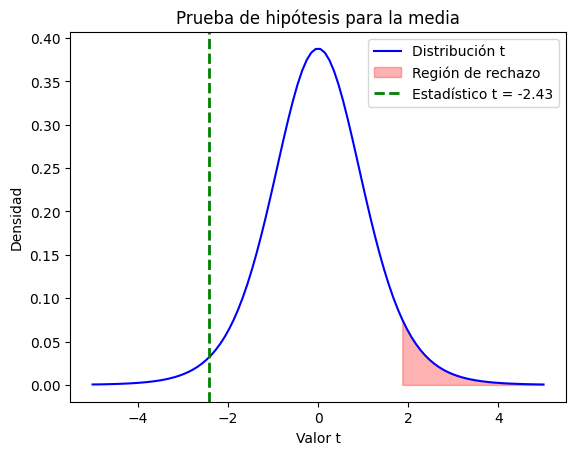

Se rechaza la hipótesis nula.


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos de ejemplo
data = np.array([25, 28, 31, 27, 30, 26, 29, 28, 32, 27])

# Prueba de hipótesis para la media
null_mean = 30  # Hipótesis nula: la media es igual a 30
alpha = 0.05  # Nivel de significancia

t_stat, p_value = stats.ttest_1samp(data, null_mean)

# Graficar la distribución t y la región de rechazo
x = np.linspace(-5, 5, 100)
y = stats.t.pdf(x, len(data) - 1)
plt.plot(x, y, 'b-', label='Distribución t')

critical_value = stats.t.ppf(1 - alpha, len(data) - 1)
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.3, label='Región de rechazo')

plt.axvline(t_stat, color='green', linestyle='dashed', linewidth=2, label=f'Estadístico t = {t_stat:.2f}')

plt.xlabel('Valor t')
plt.ylabel('Densidad')
plt.title('Prueba de hipótesis para la media')
plt.legend()
plt.show()

if p_value < alpha:
    print("Se rechaza la hipótesis nula.")
else:
    print("No se rechaza la hipótesis nula.")

En este ejemplo, se tienen datos de muestra almacenados en el arreglo `data`. Se realiza una prueba de hipótesis para determinar si la media de la población es igual a 30. Se utiliza la prueba t de Student y se calcula el valor `t` y el valor `p`. Luego, se grafica la distribución `t` y se resalta la región de rechazo correspondiente al nivel de significancia establecido. Por último, se toma la decisión de rechazar o no la hipótesis nula basándose en el valor `p`.

Es importante recordar que las pruebas de hipótesis tienen limitaciones y que los resultados obtenidos no garantizan la veracidad absoluta de una afirmación. Sin embargo, proporcionan un marco estadístico para tomar decisiones basadas en evidencia empírica y ayudan a evaluar la plausibilidad de una hipótesis dada la información disponible.

## **Diagnósticos**

El diagnóstico en el contexto de los modelos estadísticos se refiere a la evaluación de la calidad y adecuación del modelo a los datos observados. Consiste en examinar los residuos del modelo y realizar diferentes pruebas y gráficas para detectar posibles problemas o violaciones de los supuestos del modelo. El objetivo del diagnóstico es evaluar si el modelo es apropiado para describir los datos y si los resultados obtenidos son confiables.

A continuación, se describen algunos métodos comunes de diagnóstico y se proporciona un ejemplo de código en Python para realizar el diagnóstico de un modelo lineal:

1. **Análisis de residuos:**

Los residuos son las diferencias entre los valores observados y los valores predichos por el modelo. Se examinan los residuos para verificar si siguen una distribución normal, si están homogéneamente dispersos y si no presentan patrones sistemáticos.


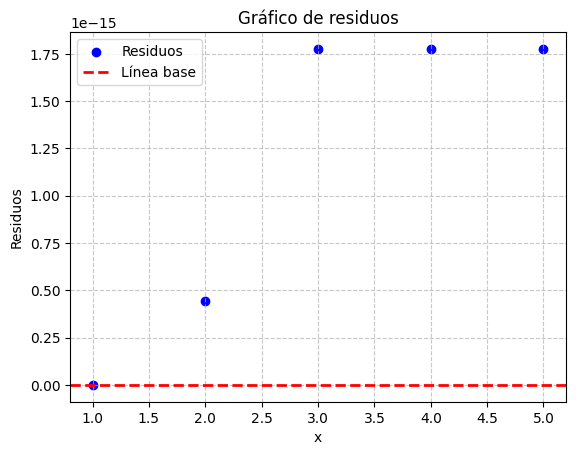

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Ajuste del modelo lineal
coefficients = np.polyfit(x, y, 1)
y_pred = np.polyval(coefficients, x)

# Cálculo de los residuos
residuals = y - y_pred

# Gráfico de los residuos con personalizaciones
plt.scatter(x, residuals, color='blue', marker='o', label='Residuos')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Línea base')

plt.xlabel('x')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

En este ejemplo, se ajusta un modelo lineal a los datos `x` e `y`. Luego, se calculan los residuos como la diferencia entre los valores observados `y` y los valores predichos `y_pred`. Se grafican los residuos en función de `x` y se traza una línea horizontal en cero para verificar si los residuos están centrados alrededor de cero y si no presentan un patrón sistemático.

2. **Pruebas de normalidad de los residuos:**

Se realizan pruebas estadísticas para verificar si los residuos siguen una distribución normal. Algunas pruebas comunes incluyen la prueba de normalidad de Shapiro-Wilk y la prueba de Kolmogorov-Smirnov.

In [5]:
from scipy import stats

# Prueba de normalidad de Shapiro-Wilk
_, p_value = stats.shapiro(residuals)

if p_value < 0.05:
    print("Los residuos no siguen una distribución normal.")
else:
    print("Los residuos siguen una distribución normal.")

Los residuos no siguen una distribución normal.


En este ejemplo, se utiliza la prueba de normalidad de `Shapiro-Wilk` para evaluar si los residuos siguen una distribución normal. Se calcula el valor `p` y se compara con un nivel de significancia predefinido (por ejemplo, 0.05) para determinar si los residuos son normalmente distribuidos.

Estos son solo ejemplos básicos de diagnósticos para modelos estadísticos. En la práctica, existen muchos otros métodos y gráficas disponibles para evaluar la calidad y el rendimiento de los modelos, como la gráfica de influencia, la detección de valores atípicos, la prueba de homogeneidad de varianzas, entre otros. La elección de los métodos de diagnóstico depende del tipo de modelo y los supuestos asociados a él.

## **Curvas ROC**

La curva ROC (Receiver Operating Characteristic) es una herramienta utilizada en la evaluación de modelos de clasificación binaria. Representa la relación entre la tasa de verdaderos positivos (Sensibilidad) y la tasa de falsos positivos (1 - Especificidad) para diferentes umbrales de clasificación. La curva ROC permite visualizar y comparar el rendimiento de diferentes modelos y seleccionar el umbral óptimo para la clasificación.

A continuación, se proporciona un ejemplo de cómo calcular y graficar la curva `ROC` en Python utilizando la biblioteca `scikit-learn`:

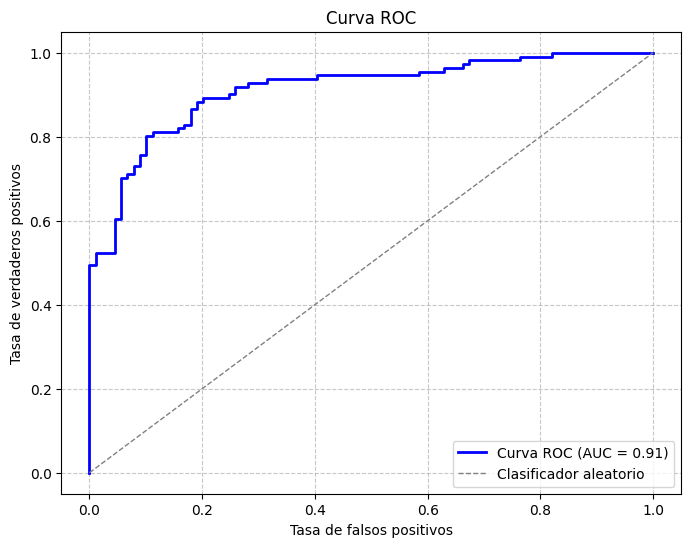

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtener las probabilidades de clasificación para los datos de prueba
probs = model.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, probs)

# Graficar la curva ROC con personalizaciones
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc), color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Clasificador aleatorio', linewidth=1)
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

En este ejemplo, se generan datos de clasificación binaria utilizando `make_classification` de scikit-learn. Luego, se ajusta un modelo de regresión logística y se obtienen las probabilidades de clasificación para los datos de prueba. A partir de estas probabilidades, se calculan la tasa de verdaderos positivos (sensibilidad), la tasa de falsos positivos (1 - especificidad) y los umbrales correspondientes utilizando `roc_curve`. Además, se calcula el área bajo la curva ROC (AUC) utilizando `roc_auc_score`. Finalmente, se grafica la curva ROC y se muestra el valor del AUC en la leyenda del gráfico.

La curva ROC es útil para evaluar y comparar diferentes modelos de clasificación, ya que proporciona información sobre el equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos en diferentes puntos de corte. Un modelo con una curva ROC que se acerque al rincón superior izquierdo del gráfico se considera mejor, ya que indica una alta tasa de verdaderos positivos y una baja tasa de falsos positivos para la clasificación. El AUC también es un indicador de la calidad del modelo, donde un valor de 1.0 representa un modelo perfecto y un valor de 0.5 indica un clasificador aleatorio.

![Curvas ROC](../img/Curvas%20ROC.png "Curvas ROC")

| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./1.REGRESION_LINEAL.ipynb)| [⏩](./3.ANALISIS_DISCRIMINANTE.ipynb)|